#📌 Extracción

In [187]:
#Importacion de biliotecas necesarias
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import json
from collections import Counter
from plotly.subplots import make_subplots

#Configuración de visualización
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

print("Librerias importadas exitosamente")

Librerias importadas exitosamente


In [78]:
# Se carga el archivo para trabajar con la data desde el repositorio github
url = "https://raw.githubusercontent.com/jose-luis-dev/TelecomX_Latam/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

#Se realiza una vista de la data
df = pd.DataFrame(data)
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [79]:
# Se valida a detalle las caracteristicas de la data
print(f"Numero de fila y columnas: {df.shape}\n")
print("***************************************")
print(f"Nombres de filas: {df.index}\n")
print("***************************************")
print(f"Nombres de columnas: {df.columns}\n")
print("***************************************\n")
df.info()

Numero de fila y columnas: (7267, 6)

***************************************
Nombres de filas: RangeIndex(start=0, stop=7267, step=1)

***************************************
Nombres de columnas: Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

***************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### El resultado de la data indica que tenemos 6 columnas y 4 de ellas esta anidadas. El siguiente proceso es extraer la información de las columnas

In [80]:
df_plano = pd.json_normalize(data)
#Validamos el resultado de la tabla
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [81]:
# Revision de columnas
print(f"Numero de fila y columnas: {df_plano.shape}\n")
print("***************************************")
df_plano.info()

Numero de fila y columnas: (7267, 21)

***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection

#🔧 Transformación

#### Esta etapa se trabajará en la identificación de las variables importantes para el análisis de evasión de clientes.

#### 1. Explorar las columnas de la data y verificar sus tipos de datos.
#### 2. Consultar el diccionario para compreder mejor el sig. de cada variable.
#### 3. Identificar las columnas relevantes para dicho análisis.

In [82]:
# Verificamos si encontramos valores únicos en cada columna
for col in df_plano.columns:
    unique_values = df_plano[col].unique()
    print(f"Valores únicos en la columna '{col}':\n {unique_values}")
    print(("-"*50),"\n")

Valores únicos en la columna 'customerID':
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
-------------------------------------------------- 

Valores únicos en la columna 'Churn':
 ['No' 'Yes' '']
-------------------------------------------------- 

Valores únicos en la columna 'customer.gender':
 ['Female' 'Male']
-------------------------------------------------- 

Valores únicos en la columna 'customer.SeniorCitizen':
 [0 1]
-------------------------------------------------- 

Valores únicos en la columna 'customer.Partner':
 ['Yes' 'No']
-------------------------------------------------- 

Valores únicos en la columna 'customer.Dependents':
 ['Yes' 'No']
-------------------------------------------------- 

Valores únicos en la columna 'customer.tenure':
 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41

In [83]:
# Validamos si cuenta con Datos duplicados
print(f"Duplicados encontrados: {df_plano.duplicated().sum()}")

# Validamos si cuenta con Datos Nulos
print(f"Nulos encontrados: {df_plano.isnull().sum().sum()}")

Duplicados encontrados: 0
Nulos encontrados: 0


In [84]:
# Validamos si cuenta con Datos Vacíos o en blanco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [85]:
#Validamos la columna requerida para el analisis "Churn"
df_plano['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [86]:
# Reemplazar cadenas vacias en la columna "Churn" por "No Info" usando .loc
##df_plano.loc[df_plano['Churn'] == '', 'Churn'] = 'No Info'

#Validamos el resultado de la columna
##df_plano['Churn'].value_counts()

In [94]:
#Resumen de los cambios de transformación de los datos

print("------Informacion de la tabla-------\n")
print(f"Numero de fila y columnas: {df_plano.shape}")
print("-"*36)
#Imprimir registros duplicados
print(f"Duplicados encontrados: {df_plano.duplicated().sum()}")
print("-"*36)
#Imprimir registros nulos
print(f"Nulos encontrados: {df_plano.isnull().sum().sum()}")
print("-"*36)
#Imprimir registros vacios
print(f"Registros vacios encontrados:\n{df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()}")
print("-"*36)
#Imprimir valores unicos de churn
print(f"Valores Únicos en Churn")
churn_counts = df_plano['Churn'].value_counts()
print(churn_counts)
print("-"*36)


------Informacion de la tabla-------

Numero de fila y columnas: (7267, 21)
------------------------------------
Duplicados encontrados: 0
------------------------------------
Nulos encontrados: 0
------------------------------------
Registros vacios encontrados:
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64
------------------------------

#### El analisis general se detecta que: Columna Charges.Total es tipo objet, sin embargo el tipo de dato capturado es tipo float.

In [101]:
# Se procede a cambiar la columna "account.Charges.Total" a Float
df_plano['account.Charges.Total'] = pd.to_numeric(df_plano['account.Charges.Total'], errors='coerce')
print("Proceso con exito:",df_plano['account.Charges.Total'].dtype)

Proceso con exito: float64


In [102]:
# Se procede a eliminar las columnas de Churn
df_plano = df_plano[df_plano['Churn'].str.strip() != '']
print("Número de filas despues de eliminar las vacías en 'Churn': ", len(df_plano))

Número de filas despues de eliminar las vacías en 'Churn':  7043


In [105]:
#Validamos la columna requerida para el analisis "Churn"
df_plano['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [107]:
# Revision de datos vacios nuevamente
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#📊 Carga y análisis

### Explorar los datos para encontrar patrones, relaciones, distribuciones e insights que expliquen el comportamiento del "Churn".

In [108]:
df_plano.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [120]:
df_plano.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [128]:
# Creacion de columna "Cuentas_Diarias"
#Evitar divisiones por cero
df_plano = df_plano[df_plano['account.Charges.Total'] != 0]

# Crear la columna solicitada
df_plano['Daily_accounts'] = (df_plano['account.Charges.Total'] / df_plano['customer.tenure']) / 30

# Verificamos los cambios solicitados
print(df_plano[['account.Charges.Total', 'customer.tenure', 'Daily_accounts']].sample(10))


      account.Charges.Total  customer.tenure  Daily_accounts
1672                 208.00             11.0        0.630303
447                 2921.75             40.0        2.434792
3655                5914.40             56.0        3.520476
5104                 156.85              8.0        0.653542
1315                 914.60             39.0        0.781709
24                    76.35              4.0        0.636250
1844                2553.35             51.0        1.668856
1804                4370.75             48.0        3.035243
2206                6474.40             72.0        2.997407
2479                 499.40             25.0        0.665867


In [143]:
# Se realiza el redondeo de los resultados
df_plano['Daily_accounts'] = df_plano['Daily_accounts'].round(3)

# Verificamos los cambios solicitados
print(df_plano[['account.Charges.Total', 'customer.tenure', 'Daily_accounts']].sample(10))

      account.Charges.Total  customer.tenure  Daily_accounts
1191                 301.55             16.0           0.628
1453                 318.60              3.0           3.540
7140                5727.45             72.0           2.652
3165                6856.45             69.0           3.312
1440                1728.20             68.0           0.847
3717                2686.05             25.0           3.581
6262                3217.55             34.0           3.154
6860                3161.60             35.0           3.011
1897                2467.10             29.0           2.836
1686                 279.50             17.0           0.548


In [145]:
df_plano = df_plano.drop('Daily_accounts', errors='ignore')

In [155]:
# Validar que la informacion no haya inf ni NaN en la columna Daily_accounts
print(f"Datos nulos encontrados NaN: ", df_plano['Daily_accounts'].isnull().sum())
print(f"Datos nulos encontrados inf: ",(df_plano['Daily_accounts'] == float('inf')).sum())

Datos nulos encontrados NaN:  11
Datos nulos encontrados inf:  0


In [156]:
# Filtrar y mostrar las filas con valores nulos en Daily_accounts
nulos_daily = df_plano[df_plano['Daily_accounts'].isnull()]
display(nulos_daily)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_accounts
975,1371-DWPAZ,No,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,NaN
1775,2520-SGTTA,No,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,NaN
1955,2775-SEFEE,No,Male,0.0,No,Yes,0.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,NaN
2075,2923-ARZLG,No,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,NaN
2232,3115-CZMZD,No,Male,0.0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,NaN
2308,3213-VVOLG,No,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,NaN
2930,4075-WKNIU,No,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,NaN
3134,4367-NUYAO,No,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,NaN
3203,4472-LVYGI,No,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,NaN
4169,5709-LVOEQ,No,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,NaN


In [ ]:
#Filtramos nuevamente los nulos para graficar
##clientes_nuevos = df_plano[df_plano['Daily_accounts'].isnull()]

#Columna auxiliar para clasificar
##df_plano[]


In [159]:
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_accounts
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.197
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.009
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.340
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.174
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0.0,No,No,13.0,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.905
7263,9992-RRAMN,Yes,Male,0.0,Yes,No,22.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.839
7264,9992-UJOEL,No,Male,0.0,No,No,2.0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.546
7265,9993-LHIEB,No,Male,0.0,Yes,Yes,67.0,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.302


In [166]:
px.histogram(df_plano, x='customer.gender', text_auto=True, color='Churn',title='Distribución de Churn - Genero', barmode = 'group')

In [192]:
print("Análisis de distribución de Churn")
print("="*35)
print("Total de registros absolutos")
print(df_plano['Churn'].value_counts())

#Contar y calcular porcentaje
Churn_percentages = df_plano['Churn'].value_counts(normalize=True) * 100
print("\nTotal de registros porcentual")
for category, percentage in Churn_percentages.items():
    print(f"{category}: {percentage:.2f}%")


# Datos dinámicos desde tu DataFrame
labels = df_plano['Churn'].value_counts().index.tolist()  # ['No', 'Yes'] o ['0', '1']
counts = df_plano['Churn'].value_counts().tolist()
percentages = (df_plano['Churn'].value_counts(normalize=True) * 100).tolist()

# Crear figura con 1 fila y 2 columnas
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Distribución de Churn - Cantidades", "Distribución de Churn - Porcentajes"),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])

# Gráfica de barras con números
fig.add_trace(
    go.Bar(x=labels, y=counts,
           text=[f"{c}" for c in counts],  # Solo número
           textposition='auto',
           marker_color=['#66b3ff','#ff9999']),
    row=1, col=1
)

# Gráfica de pastel con porcentajes
fig.add_trace(
    go.Pie(labels=labels, values=counts,
           textinfo='percent+label',  # Solo porcentaje y etiqueta
           marker=dict(colors=['#66b3ff','#ff9999'])),
    row=1, col=2
)

# Ajustar diseño
fig.update_layout(title_text="Distribución de Churn", height=500, width=900)
fig.show()

# Calcular tasa de Churn
churn_rate = df_plano['Churn'].value_counts(normalize=True)[1] * 100
print(f"\nTasa de Churn: {churn_rate:.2f}%")
print(f"Cada 100 clientes, {churn_rate:.0f} se van")

Análisis de distribución de Churn
Total de registros absolutos
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Total de registros porcentual
No: 73.46%
Yes: 26.54%



Tasa de Churn: 26.54%
Cada 100 clientes, 27 se van


In [193]:
df_plano.describe().T

,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.000,0.00000,0.000,0.0000,1.000
customer.tenure,7043.0,32.371149,24.559481,0.000,9.00000,29.000,55.0000,72.000
account.Charges.Monthly,7043.0,64.761692,30.090047,18.250,35.50000,70.350,89.8500,118.750
account.Charges.Total,7032.0,2283.300441,2266.771362,18.800,401.45000,1397.475,3794.7375,8684.800
Daily_accounts,7032.0,2.159980,1.006199,0.459,1.20625,2.346,3.0060,4.047


In [196]:
# Mediana para variables numéricas
df_plano[['customer.tenure','account.Charges.Monthly','account.Charges.Total','Daily_accounts']].median()
# Valores únicos de columnas categóricas para entender su distribución
df_plano.select_dtypes(include='object').nunique()

,0
customerID,7043
Churn,2
customer.gender,2
customer.Partner,2
customer.Dependents,2
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3
internet.OnlineSecurity,3
internet.OnlineBackup,3


#### Objetivo: Calcular medidas estadísticas que ayuden a conocer mejor la distribución general de los datos numeros de la data.

####Se realiza un análisis descriptivo de los datos. Calculando métricas como media, mediana, desviacion estándar y otras medidas para comprender mejor la distribución y el comportamiento de los clientes.

#### Distribución de evasión

#### El objetivo es comprender cómo esta distribuida la evasión entre los clientes. Para visualizar la proporción de clientes que permanecieron y los que se dieron de baja

#### Se explora cómo se distribuye la evasión según variables categóricas como género, tipo de contrato, método del pago, entre otras.

### Tablas de Evasión por categorias

In [206]:
cat_vars = ['customer.gender']

for col in cat_vars:
    print(f"\n===== Tabla de Evasión según {col} =====\n")

    # Tabla con totales y porcentajes
    tabla = pd.crosstab(df_plano[col], df_plano['Churn'], margins=True, margins_name='Total')
    tabla_pct = pd.crosstab(df_plano[col], df_plano['Churn'], normalize='index') * 100
    display(tabla)
    display(tabla_pct.round(2))


px.histogram(df_plano, x='customer.gender', text_auto=True, color='Churn',title='Distribución de Churn - Genero', barmode = 'group')




===== Tabla de Evasión según customer.gender =====



Churn,No,Yes,Total
customer.gender,,,
Female,2549,939,3488
Male,2625,930,3555
Total,5174,1869,7043


Churn,No,Yes
customer.gender,,
Female,73.08,26.92
Male,73.84,26.16


In [210]:
cat_vars = ['customer.Partner']

for col in cat_vars:
    print(f"\n===== Tabla de Evasión según {col} =====\n")

    # Tabla con totales y porcentajes
    tabla = pd.crosstab(df_plano[col], df_plano['Churn'], margins=True, margins_name='Total')
    tabla_pct = pd.crosstab(df_plano[col], df_plano['Churn'], normalize='index') * 100
    display(tabla)
    display(tabla_pct.round(2))

px.histogram(df_plano, x='customer.Partner', text_auto=True, color='Churn',title='Distribución de Churn - Partner', barmode = 'group')



===== Tabla de Evasión según customer.Partner =====



Churn,No,Yes,Total
customer.Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
Total,5174,1869,7043


Churn,No,Yes
customer.Partner,,
No,67.04,32.96
Yes,80.34,19.66


In [212]:
cat_vars = ['customer.Dependents']

for col in cat_vars:
    print(f"\n===== Tabla de Evasión según {col} =====\n")

# Tabla con totales y porcentajes
    tabla = pd.crosstab(df_plano[col], df_plano['Churn'], margins=True, margins_name='Total')
    tabla_pct = pd.crosstab(df_plano[col], df_plano['Churn'], normalize='index') * 100
    display(tabla)
    display(tabla_pct.round(2))

px.histogram(df_plano, x='customer.Dependents', text_auto=True, color='Churn',title='Distribución de Churn - Dependents', barmode = 'group')


===== Tabla de Evasión según customer.Dependents =====



Churn,No,Yes,Total
customer.Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
Total,5174,1869,7043


Churn,No,Yes
customer.Dependents,,
No,68.72,31.28
Yes,84.55,15.45


In [213]:
cat_vars = ['internet.InternetService']

for col in cat_vars:
    print(f"\n===== Tabla de Evasión según {col} =====\n")

# Tabla con totales y porcentajes
    tabla = pd.crosstab(df_plano[col], df_plano['Churn'], margins=True, margins_name='Total')
    tabla_pct = pd.crosstab(df_plano[col], df_plano['Churn'], normalize='index') * 100
    display(tabla)
    display(tabla_pct.round(2))

px.histogram(df_plano, x='internet.InternetService', text_auto=True, color='Churn',title='Distribución de Churn - InternetService', barmode = 'group')


===== Tabla de Evasión según internet.InternetService =====



Churn,No,Yes,Total
internet.InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
Total,5174,1869,7043


Churn,No,Yes
internet.InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


In [214]:
cat_vars = ['account.Contract']

for col in cat_vars:
    print(f"\n===== Tabla de Evasión según {col} =====\n")

# Tabla con totales y porcentajes
    tabla = pd.crosstab(df_plano[col], df_plano['Churn'], margins=True, margins_name='Total')
    tabla_pct = pd.crosstab(df_plano[col], df_plano['Churn'], normalize='index') * 100
    display(tabla)
    display(tabla_pct.round(2))

px.histogram(df_plano, x='account.Contract', text_auto=True, color='Churn',title='Distribución de Churn - Contract', barmode = 'group')


===== Tabla de Evasión según account.Contract =====



Churn,No,Yes,Total
account.Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
Total,5174,1869,7043


Churn,No,Yes
account.Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


In [216]:
cat_vars = ['account.PaymentMethod']

for col in cat_vars:
    print(f"\n===== Tabla de Evasión según {col} =====\n")

# Tabla con totales y porcentajes
    tabla = pd.crosstab(df_plano[col], df_plano['Churn'], margins=True, margins_name='Total')
    tabla_pct = pd.crosstab(df_plano[col], df_plano['Churn'], normalize='index') * 100
    display(tabla)
    display(tabla_pct.round(2))

px.histogram(df_plano, x='account.PaymentMethod', text_auto=True, color='Churn',title='Distribución de Churn - PaymentMethod', barmode = 'group')


===== Tabla de Evasión según account.PaymentMethod =====



Churn,No,Yes,Total
account.PaymentMethod,,,
Bank transfer (automatic),1286,258,1544
Credit card (automatic),1290,232,1522
Electronic check,1294,1071,2365
Mailed check,1304,308,1612
Total,5174,1869,7043


Churn,No,Yes
account.PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


In [217]:
px.histogram(df_plano, x = 'customer.tenure', text_auto = True, color = 'Churn', barmode = 'group')

#### Se explora las variables como total gastado o tiempo de contrato

#### Objetivo se visualizar como se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelarón.

In [219]:
px.box(df_plano, x = 'Churn', y = 'account.Charges.Monthly', color = 'Churn')

In [221]:
px.box(df_plano, x = 'Churn', y = 'account.Charges.Total', color = 'Churn')

In [222]:
px.box(df_plano, x = 'Churn', y = 'customer.tenure', color = 'Churn')

In [224]:
# Agrupar por tenure y Churn
df_grouped = df_plano.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calcular el % de churn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['churn_rate']])


Churn            churn_rate
customer.tenure            
0.0                0.000000
1.0               61.990212
2.0               51.680672
3.0               47.000000
4.0               47.159091
...                     ...
68.0               9.000000
69.0               8.421053
70.0               9.243697
71.0               3.529412
72.0               1.657459

[73 rows x 1 columns]


In [225]:
fig = px.line(df_grouped.reset_index(),
              x='customer.tenure',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por Tenure')
fig.show()

In [194]:
df_plano.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_accounts'],
      dtype='object')

In [233]:
import plotly.express as px

px.histogram(
    df_plano,
    x='customer.tenure',
    color='Churn',
    text_auto=True,
    barmode='group',     # Barras lado a lado
    nbins=30             # Número de bins para controlar el agrupamiento
)

In [234]:
import plotly.express as px

px.histogram(
    df_plano,
    x='account.Charges.Monthly',
    color='Churn',
    text_auto=True,
    barmode='group',
    nbins=30
)


In [235]:
import plotly.express as px

px.histogram(
    df_plano,
    x='account.Charges.Total',
    color='Churn',
    text_auto=True,
    barmode='group',
    nbins=30
)

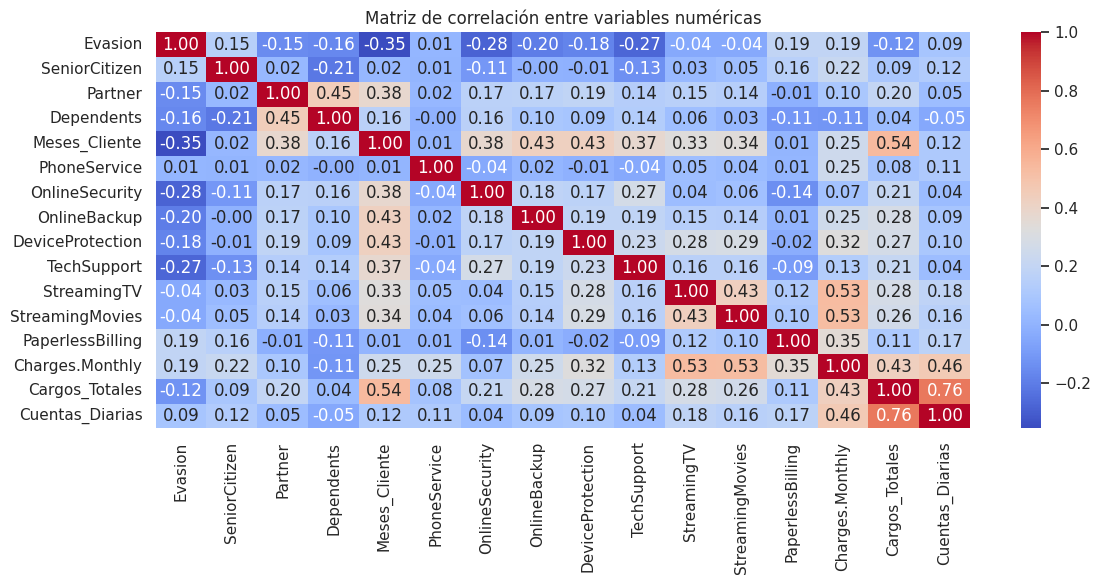

In [ ]:
import numpy as np

plt.figure(figsize=(12,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


#📄Informe final

# 📄 Introducción

 La empresa **Telecom X** enfrenta una alta tasa de cancelación de clientes(**Evasión**), lo que afecta directamente sus ingresos y sostenibilidad a largo plazo. El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes a partir de un conjunto de datos proporcionado por la compañia. Permitiendo así generar insights accionables y sentar las bases para el desarrollo de modelos predictivos que apoyen estrategias de retención.

<br>
<br>

#♻️ Limpieza y Tratamiento de Datos

Se cargó el dataset desde una API y se transformó en un DataFrame de pandas.
Algunas columnas etaban anidadas en estructuras JSON, por lo que se usó json_normalize para expandir los datos.


**Principales tratamientos realizados:**

1. Eliminación de 11 registros con valores nulos en variable numéricas clave.
2. Conversión de columnas como Charges.Total a formato float para su análisis.
3. Creación de la columna Cuentas_Diarias dividiendo Charges.Total entre Meses_Cliente x 30.
4. Traducción de nombres de la columnas y valores para mayor claridad.
5. Estandarización de valores categóricos ("Si/No" a 1/0).

<br>
<br>

#📊 Análisis Exploratorio de Datos (EDA)

1. Análisis Descriptivo

    - El 26.6% de los clientes abandonaron el servicio.

    - La mayoría de los clientes tienen contrato "Mes a mes".

    - La media de meses como cliente es de 32 meses.
<br>
<br>

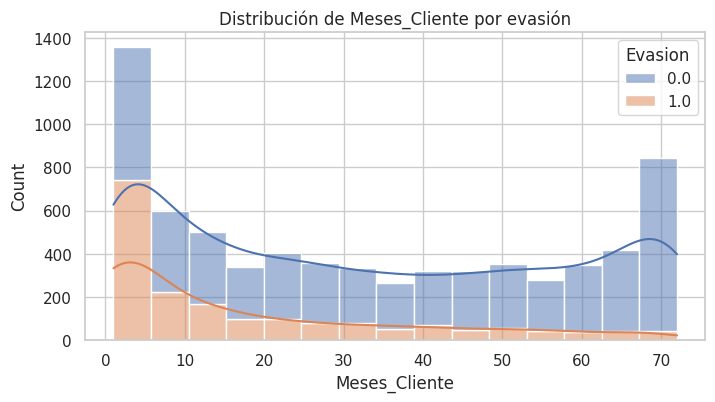

<br>
<br>

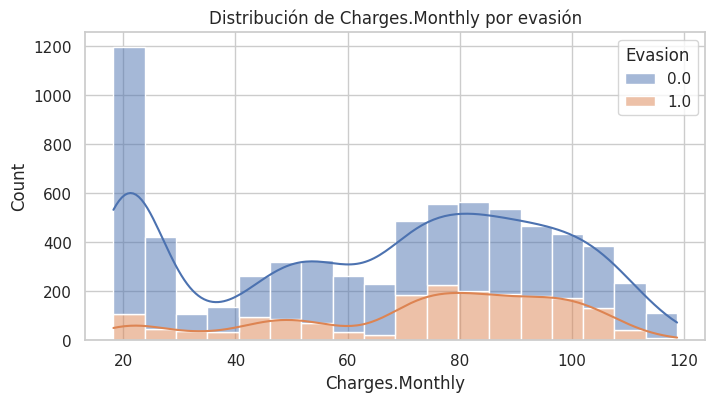
<br>
<br>

2. Distribución de Evasión

  - Aproximadamente 27% de los clientes se dieron de baja.

  - La distribución se visualizó mediante gráficas de barras y proporciones.

<br>
<br>

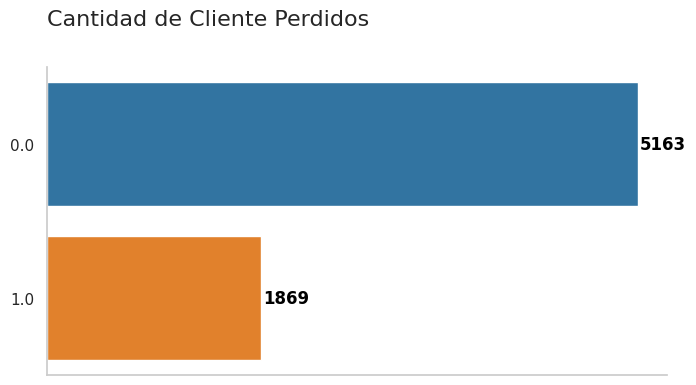

<br>
<br>

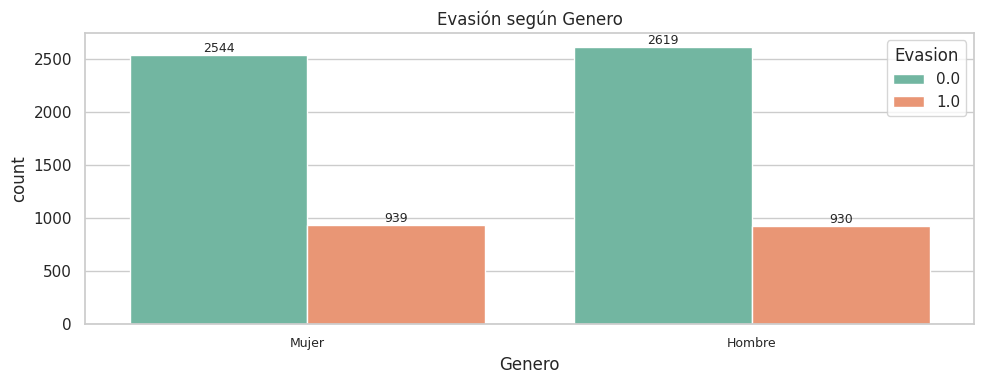

<br>
<br>


3. Evasión por Variables Categóricas

  - Los clientes con contrato “Mes a mes” representan el grupo con mayor evasón (42.7%).

  - Clientes con “Fibra óptica” tienen una tasa de evasón del 41.89%, considerablemente mayor que quienes no tienen servicio de internet.

  - Métodos de pago como "Cheque electrónico" presentan mayor churn (45.29%).

<br>
<br>


4. Evasión por Variables Numéricas

  - Se usaron boxplots para mostrar la distribución de cargos mensuales, totales y tiempo como cliente.

  - Los clientes con menor tiempo en la compañía tienen mayor tendencia a abandonar.

  - Se observó correlación positiva entre Meses_Cliente y Cargos_Totales.
<br>
<br>

#🔹 Conclusiones e Insights


  - Tiempo de permanencia: Los clientes con menos de un año en la compañía presentan mayor probabilidad de evasón.

  - Tipo de contrato: Contratos más largos tienen menor churn, destacando el contrato de dos años con solo 2.85% de evasiones.

  - Tipo de internet: El uso de fibra óptica, aunque tecnológicamente superior, está asociado a una mayor tasa de cancelación.

  - Método de pago: Cheques electrónicos se asocian a mayor churn, mientras que tarjetas de crédito automáticas y transferencias tienen menor tasa de baja.

<br>
<br>

# 🔎 Recomendaciones

  - Incentivar contratos anuales o bianuales con beneficios (descuentos, bonos).

  - Revisar experiencia del cliente con fibra óptica, ya que podría haber problemas de servicio o costos elevados.

  - Ofrecer alternativas de pago más estables y promover domiciliación bancaria o tarjetas.

  - Segmentar los clientes nuevos (<12 meses) y ofrecer programas de retención personalizados.

